In [1]:
import numpy as np
mols = ["H2","CH","CH2","NH","CH3","NH2","OH","HF",
        "H2O","NH3","C2H","CN","C2H2","CO","HCN","N2",
        "HCO","CF","NO","HNO","O2","HO2","OF","H2O2","F2","CO2"]
data_dic = {}
with open("/home/yichi/research/afqmc_cisd_data/heat/ene.dz.txt") as f:
    for line in f:
        parts = line.split()
        species = parts[0]
        data_dic[species] = {}
        data_dic[species]["ccsdt"] = float(parts[1])
        data_dic[species]["ccsdt[q]"] = float(parts[2])
        data_dic[species]["ccsdt(q)"] = float(parts[3])
        data_dic[species]["ccsdtq"] = float(parts[4])
        data_dic[species]["ccsdtqp"] = float(parts[5])

ref = np.array([data_dic[mol]["ccsdtqp"] for mol in mols])
ccsdtq = np.array([data_dic[mol]["ccsdtq"] for mol in mols])

data = np.loadtxt("/home/yichi/research/afqmc_cisd_data/heat/ene.txt", delimiter=",")
afqmc_hf = (data[:, 1] - ref) * 1000
# afqmc_hf_rmsd = np.sqrt(np.mean((afqmc_hf) \*\* 2))
afqmc_hf_stoc_err = data[:, 2] * 1000
# ccsdtq = (ccsdtq - ref) _ 1000
# ccsdtq_rmsd = np.sqrt(np.mean((ccsdtq) \*\* 2))
# ccsdpt = (data[:, 4] - ref) _ 1000
# ccsdpt_rmsd = np.sqrt(np.mean((ccsdpt) ** 2))
afqmc_cisd = (data[:, 5] - ref) * 1000
# afqmc_cisd_rmsd = np.sqrt(np.mean((afqmc_cisd) ** 2))
afqmc_cisd_stoc_err = data[:, 6] *1000

In [2]:
for i,mol in enumerate(mols):
    data_dic[mol]["afqmc_hf"] = data[i, 1]
    data_dic[mol]["afqmc_cisd"] = data[i, 5]

In [3]:
for i,mol in enumerate(mols):
    data_dic[mol]["afqmc_hf_err(mH)"] = data[i, 2] * 1000
    data_dic[mol]["afqmc_cisd_err(mH)"] = data[i, 6] * 1000

In [4]:
data_dic['CN']

{'ccsdt': -92.491172,
 'ccsdt[q]': -92.492299,
 'ccsdt(q)': -92.493159,
 'ccsdtq': -92.492577,
 'ccsdtqp': -92.49276,
 'afqmc_hf': -92.4997,
 'afqmc_cisd': -92.4911,
 'afqmc_hf_err(mH)': 0.2,
 'afqmc_cisd_err(mH)': 0.1}

In [29]:
my_data = '''
#   Mol          CCSD(T)              AFQMC/CCSD_PT                  AFQMC/CCSD_PT2
    C2H       -76.39855638        -76.399014 +/- 0.000051       -76.399562 +/- 0.000058
    C2H2      -77.10924902        -77.109546 +/- 0.000064       -77.109680 +/- 0.000115
    CF        -137.4748482        -137.475760 +/- 0.000192      -137.475671 +/- 0.000156
    CH        -38.37935551        -38.380189 +/- 0.000024       -38.379985 +/- 0.000011
    CH2       -39.04119570        -39.041474 +/- 0.000006       -39.041480 +/- 0.000007
    CH3       -39.71553966        -39.715980 +/- 0.000010       -39.715982 +/- 0.000011
    CN        -92.48869527        -92.487483 +/- 0.000157       -92.490868 +/- 0.000417 (-92.490273 +/- 0.000163)
    CO        -113.0544306        -113.055092 +/- 0.000092      -113.054777 +/- 0.000109
    CO2       -188.1474293        -188.148924 +/- 0.000137      -188.148620 +/- 0.000120
    F2        -199.0963839        -199.098269 +/- 0.000057      -199.098891 +/- 0.000077
    H2        -1.163426264        -1.163426 +/- 0.000001         -1.163423 +/- 0.000001
    H2O       -76.24101779        -76.241701 +/- 0.000038       -76.241738 +/- 0.000062
    H2O2      -151.1936301        -151.194724 +/- 0.000058      -151.194733 +/- 0.000060
    HCN       -93.18832063        -93.189107 +/- 0.000157       -93.188920 +/- 0.000157
    HCO       -113.5757054        -113.576087 +/- 0.000097      -113.575954 +/- 0.000145
    HF        -100.2281312        -100.228669 +/- 0.000031      -100.228645 +/- 0.000032
    HNO       -130.1696778        -130.172789 +/- 0.000079      -130.172245 +/- 0.000218 (-130.172028 +/- 0.000074)
    HO2       -150.5584809        -150.559452 +/- 0.000056      -150.559348 +/- 0.000056
    N2        -109.2752986        -109.276029 +/- 0.000140      -109.275833 +/- 0.000121
    NH        -55.09129056        -55.091499 +/- 0.000007       -55.091517 +/- 0.000018
    NH2       -55.73250631        -55.732956 +/- 0.000013       -55.732938 +/- 0.000013
    NH3       -56.40191327        -56.402489 +/- 0.000029       -56.402502 +/- 0.000031
    NO        -129.5977782        -129.598245 +/- 0.000077      -129.597858 +/- 0.000095
    O2        -149.9856842        -149.985698 +/- 0.000084      -149.985554 +/- 0.000068
    OF        -174.4979237        -174.498355 +/- 0.000059      -174.498380 +/- 0.000174 (-174.498199 +/- 0.000062)
    OH        -75.55923331        -75.559572 +/- 0.000015       -75.559586 +/- 0.000016
'''

In [30]:
for line in my_data.splitlines():
    if not line.startswith('#'):
        if len(line) > 0 :
            mol = line.split()[0]
            ccsd_t = line.split()[1]
            afqmc_ccsd_pt = line.split()[2]
            afqmc_ccsd_pt_err = line.split()[4]
            afqmc_ccsd_pt2 = line.split()[5]
            afqmc_ccsd_pt2_err = line.split()[7]
            data_dic[mol]["ccsd(t)"] = float(ccsd_t)
            data_dic[mol]["afqmc_ccsd_pt"] = float(afqmc_ccsd_pt)
            data_dic[mol]["afqmc_ccsd_pt_err(mH)"] = float(afqmc_ccsd_pt_err)*1000
            data_dic[mol]["afqmc_ccsd_pt2"] = float(afqmc_ccsd_pt2)
            data_dic[mol]["afqmc_ccsd_pt2_err(mH)"] = float(afqmc_ccsd_pt2_err)*1000


In [15]:
data_dic['H2O2']

{'ccsdt': -151.193903,
 'ccsdt[q]': -151.195141,
 'ccsdt(q)': -151.195317,
 'ccsdtq': -151.195183,
 'ccsdtqp': -151.195266,
 'afqmc_hf': -151.1963,
 'afqmc_cisd': -151.19516,
 'afqmc_hf_err(mH)': 0.2,
 'afqmc_cisd_err(mH)': 0.08,
 'ccsd(t)': -151.1936301,
 'afqmc_ccsd_pt': -151.194724,
 'afqmc_ccsd_pt_err(mH)': 0.058,
 'afqmc_ccsd_pt2': -151.194724,
 'afqmc_ccsd_pt2_err(mH)': 0.058}

In [31]:
ccsd_t = []
ccsdtqp = []
afqmc_hf = []
afqmc_cisd = []
afqmc_ccsd_pt = [] 
afqmc_ccsd_pt2 = []
for mol in mols:
    ccsd_t = np.hstack((ccsd_t,data_dic[mol]['ccsd(t)']))
    ccsdtqp = np.hstack((ccsdtqp,data_dic[mol]['ccsdtqp']))
    afqmc_hf = np.hstack((afqmc_hf,data_dic[mol]['afqmc_hf']))
    afqmc_cisd = np.hstack((afqmc_cisd,data_dic[mol]['afqmc_cisd']))
    afqmc_ccsd_pt = np.hstack((afqmc_ccsd_pt,data_dic[mol]['afqmc_ccsd_pt']))
    afqmc_ccsd_pt2 = np.hstack((afqmc_ccsd_pt2,data_dic[mol]['afqmc_ccsd_pt2']))

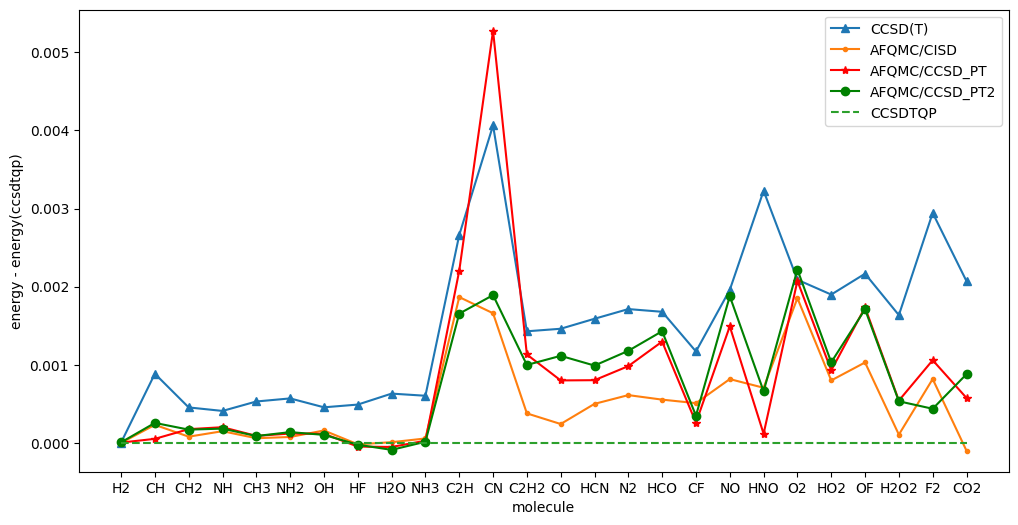

In [39]:
from matplotlib import pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(mols,ccsd_t-ccsdtqp,'^-',label='CCSD(T)')
# plt.plot(mols,afqmc_hf-ccsdtqp,'x-',label='AFQMC/HF')
plt.plot(mols,afqmc_cisd-ccsdtqp,'.-',label='AFQMC/CISD')
plt.plot(mols,afqmc_ccsd_pt-ccsdtqp,'*-',color='red',label='AFQMC/CCSD_PT')
plt.plot(mols,afqmc_ccsd_pt2-ccsdtqp,'o-',color='green',label='AFQMC/CCSD_PT2')
plt.plot(mols,[0]*len(mols),'--',label='CCSDTQP')
plt.xlabel('molecule')
plt.ylabel('energy - energy(ccsdtqp)')
plt.legend()
plt.show()

In [19]:
# AFQMC/UCCSD_PT energy: -92.487483 +/- 0.000157
# AFQMC/UCCSD_PT2 energy: -92.490868 +/- 0.000417
uccsd_pt = -92.487483
uccsd_pt2 = -92.490868
afqmc_cisd = data_dic['CN']['afqmc_cisd']
ccsdtqp = data_dic['CN']['ccsdtqp']
dE = -92.490868 - -92.487483
print(f'AFQMC/UCCSD_PT energy: {uccsd_pt} err(ccsdtqp): {1000*(uccsd_pt-ccsdtqp):.6f}')
print(f'AFQMC/UCISD_PT2 energy: {uccsd_pt2} err(ccsdtqp): {1000*(uccsd_pt2-ccsdtqp):.6f}')
print(f'energy (mH) lowered by exact T1: {dE*1000:.3f}')
print(f'AFQMC/UCISD energy: {afqmc_cisd} err(ccsdtqp): {1000*(afqmc_cisd-ccsdtqp):.6f}')
print(f'CCSDTQQ energy: {ccsdtqp}')

AFQMC/UCCSD_PT energy: -92.487483 err(ccsdtqp): 5.277000
AFQMC/UCISD_PT2 energy: -92.490868 err(ccsdtqp): 1.892000
energy (mH) lowered by exact T1: -3.385
AFQMC/UCISD energy: -92.4911 err(ccsdtqp): 1.660000
CCSDTQQ energy: -92.49276


In [6]:
import numpy as np
# cu2o2 f=0
# AFQMC/CCSD_PT energy 1: -542.078835 +/- 0.003585
# AFQMC/CCSD_PT energy 2: -542.074097 +/- 0.000853
# cu2o2 f=1
# AFQMC/CCSD_PT energy 1: -542.115204 +/- 0.001224
# AFQMC/CCSD_PT energy 2: -542.114746 +/- 0.001186
dE1 = -542.115204 - -542.078835
dE2 = -542.114746 - -542.074097
d1 = np.sqrt(0.003585**2+0.001224**2)
d2 = np.sqrt(0.000853**2+0.001186**2)
print('Cu2O2(2+) E(f=0) - E(f=1) (kcal/mol)')
print(f'AFQMC/CCSD_PT energy covariance: {-dE1*627.509608:.2f} +/- {d1*627.509608:.2f}')
print(f'AFQMC/CCSD_PT energy direct observation: {-dE2*627.509608:.2f} +/- {d2*627.509608:.2f}')
print('fp-AFQMC reference: 24.1(9)')
print('AFQMC/CISD reference: 24.1(8)')

Cu2O2(2+) E(f=0) - E(f=1) (kcal/mol)
AFQMC/CCSD_PT energy covariance: 22.82 +/- 2.38
AFQMC/CCSD_PT energy direct observation: 25.51 +/- 0.92
fp-AFQMC reference: 24.1(9)
AFQMC/CISD reference: 24.1(8)


In [ ]:
# cu2o2(2+)             f0                  f1           DE(kcal/mol)
# CCSD(T)           -542.0885           -542.1373           30.6
# AFQMC/HF          -542.0966(7)        -542.152(1)         34.8(8)
# AFQMC/CISD        -542.0906(9)        -542.1290(9)        24.1(8)
# fp-AFQMC          -542.0964(7)        -542.1348(7)        24.1(6)
# AFQMC/CCSD_PT:    -542.0741(8)        -542.115(1)         25.5(9)
# AFQMC/UCCSD_PT2:  -542.0791(8)        -542.1305(8)        32.2(7)
dE = -542.079116 - -542.130499
ddE = np.sqrt(0.000806**2 + 0.000753**2)
print(f'AFQMC/CCSD_PT2 E(f=0) - E(f=1) (kcal/mol): {dE*627.509608:.2f} +/- {ddE*627.509608:.2f}')

AFQMC/CCSD_PT2 E(f=0) - E(f=1) (kcal/mol): 32.24 +/- 0.69


In [ ]:
# h0 = -305.96792844
# <exp(t1)> = 1.717595 +/- 0.000252
# <t2> = 0.616747 +/- 0.000145 <exp(T1)HF|T2 |walkers>/<HF|walkers>
# <e0> = -405.589294 +/- 0.059519 <exp(T1)HF|h1+h2|walkers>/<HF|walkers>
# <e1> = -145.679718 +/- 0.034071 <exp(T1)HF|T2 (h1+h2)|walkers>/<HF|walkers>
-305.96792844 + -405.589294/1.717595

-542.1058387157052

In [41]:
-145.679718/1.717595 - -405.589294*0.616747/1.717595**2

-0.024668359647989746

In [47]:
e0, t1, t2, e1, h0 = -405.589294, 1.717595, 0.616747, -145.679718, -305.96792844
E0 = e0/t1+h0
E1 = e1/t1 - e0*t2/t1/t1
print(E0, E1, E0+E1)

-542.1058387157052 -0.024668359647989746 -542.1305070753532


In [46]:
# h0 = -301.44235463
# <exp(t1)> = 1.324584 +/- 0.000199
# <t2> = 0.406824 +/- 0.000193
# <e0> = -318.702423 +/- 0.047761
# <e1> = -97.925377 +/- 0.046302
# AFQMC/UCCSD_PT2 energy (covariance): -542.079116 +/- 0.000806

e0, t1, t2, e1, h0 = -318.702423, 1.324584, 0.406824, -97.925377, -301.44235463
E0 = e0/t1+h0
E1 = e1/t1 - e0*t2/t1/t1
print(E0, E1, E0+E1)

-542.048026297482 -0.031115602746439208 -542.0791419002285
